In [2]:
import re
import jieba
import cntext as ct
# from umap import UMAP
# from hdbscan import HDBSCAN
from cuml import UMAP
from cuml.manifold import HDBSCAN
from sklearn.cluster import KMeans
from bertopic import BERTopic

umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0, metric='cosine')
# hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=1,metric='euclidean', cluster_selection_method='eom')
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')

stopwords = ct.load_pkl_dict('STOPWORDS.pkl')['STOPWORDS']['chinese']

def clean_text(text):
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords]
    return ' '.join(words)



In [3]:
from gensim.models import KeyedVectors

chinese_news_models = KeyedVectors.load_word2vec_format('sgns.merge.word.bz2', unicode_errors='ignore')



In [4]:

topic_model = BERTopic(language="chinese (simplified)", 
                       embedding_model=chinese_news_models,
                       umap_model=umap_model,
                       hdbscan_model=hdbscan_model,
                       calculate_probabilities=False, 
                       verbose=True,
                       nr_topics='auto'
                       )

In [70]:
import pandas as pd
data = pd.read_csv('./zhihu.csv',encoding='UTF-8')
# weibo_content_list=data.iloc[:, 1].tolist()
# weibo_hot_list=data.iloc[:, 2].tolist()
print(data.head())


   create_time                                    title   hot      date
0   1614456590      2021 年 3 月 1 日禁止台湾菠萝入境，对台湾的影响究竟有多大？  4022  20210301
1   1614385612         如何看待中科大 26 岁教授陈杲攻克数学复微分几何领域世界难题？  2004  20210301
2   1614099376              如何看待山东拉面哥十几年坚持一碗拉面三块不涨价的行为？  1823  20210301
3   1614262183  爸爸为弟弟买房，让我以后一起还房贷。我拒绝了，爸爸说我不知道心疼他，我有错么？  1246  20210301
4   1614427595                              如何评价吴孟达的地位？  1206  20210301


In [71]:
data['date']=pd.to_datetime(data['date'], format='%Y%m%d')
print(data['date'])

0       2021-03-01
1       2021-03-01
2       2021-03-01
3       2021-03-01
4       2021-03-01
           ...    
10695   2021-05-01
10696   2021-05-01
10697   2021-05-01
10698   2021-05-01
10699   2021-05-01
Name: date, Length: 10700, dtype: datetime64[ns]


In [72]:
#print(data['date'])
data_sorted = data.sort_values(by='date')
print(data_sorted)

       create_time                                     title   hot       date
0       1614456590       2021 年 3 月 1 日禁止台湾菠萝入境，对台湾的影响究竟有多大？  4022 2021-03-01
120     1610386190                           你每天努力工作到底在追求什么？    86 2021-03-01
121     1474879013                            大家考研时都用了些什么资料？    84 2021-03-01
122     1585364939         考研英语一推荐买考研真相还是黄皮书呢？什么时候开始做真题比较好呢？    83 2021-03-01
123     1612591989                如果你是《怪物猎人：世界》中的龙，你该如何打败猎人？    82 2021-03-01
...            ...                                       ...   ...        ...
10586   1619834435  国王 110:106 险胜湖人，詹姆斯复出戴维斯 22+11，如何评价这场比赛？   173 2021-05-01
10587   1619831149             如何看待美国宣布将对印度实行旅行限制措施？会产生什么影响？   170 2021-05-01
10588   1619063782                        2021 年生活在日本的你感觉如何？   169 2021-05-01
10580   1619531027                        打排位只会两个位置真的不该玩王者吗？   209 2021-05-01
10699   1617333922                              有没有给宝宝推荐的绘本？     8 2021-05-01

[10700 rows x 4 columns]


In [73]:
data_sorted.reset_index(inplace=True)


In [74]:
print(data_sorted.iloc[0,:])

index                                            0
create_time                             1614456590
title          2021 年 3 月 1 日禁止台湾菠萝入境，对台湾的影响究竟有多大？
hot                                           4022
date                           2021-03-01 00:00:00
Name: 0, dtype: object


In [75]:
weibo_content_list=data_sorted.iloc[:, 2].tolist()
weibo_hot_list=data_sorted.iloc[:,3].tolist()
weibo_tuple_list = []
for i in range(len(weibo_hot_list)):
    hot_num=int(weibo_hot_list[i])
    if(hot_num==0):hot_num=1
    weibo_tuple_list.append((weibo_content_list[i],hot_num))



[('2021 年 3 月 1 日禁止台湾菠萝入境，对台湾的影响究竟有多大？', 4022), ('你每天努力工作到底在追求什么？', 86), ('大家考研时都用了些什么资料？', 84), ('考研英语一推荐买考研真相还是黄皮书呢？什么时候开始做真题比较好呢？', 83), ('如果你是《怪物猎人：世界》中的龙，你该如何打败猎人？', 82), ('中考的最后三个月是怎么熬过来的？', 81), ('XO 型腿如何靠按摩或锻炼矫正？', 79), ('如何看待湖南男子因琐事将邻居三人扔下楼致两死一伤，一审获死刑？', 77), ('假如给你 1 个亿，只能持有 1 天，操作所得的收益归你，你会怎么操作？', 77), ('有哪些适合学生党的性价比高的护肤品？', 75), ('有哪些好看到爆的蓝色系头像？', 75), ('和公婆住在一起有没有很压抑？', 75), ('事业单位应该怎么备考呢？', 74), ('选临床医学在中国真的有出路吗?', 74), ('Java 开发工作者每天在做什么？', 74), ('做外贸有哪些比较好的软件可以推荐？', 72), ('如何提高文综的选择题正确率？', 72), ('如何系统地训练口才？', 72), ('如果有一天你在大学宿舍床上睡觉，在宿舍的人以为趁你睡着的时候说你坏话被你听到了，你会怎么办？', 72), ('你有过等一个人很久吗？', 71), ('从什么时候开始觉得爱情其实不是很重要了？', 86), ('如何以「师尊从凡间带回来了一名女子」为开头写个故事？', 88), ('有没有英语四级的资料推荐?', 90), ('怎样从 103 斤瘦到 90 斤?', 91), ('考研复试面试，很容易紧张到发抖该怎么办？', 116), ('教育惩戒新规 3 月起实施，学校、教师可采取哪些教育惩戒措施？哪些行为被明确禁止？', 115), ('《请回答 1988》里正焕为什么一直不敢正面追求德善？', 115), ('你周围有什么很神秘的人？', 110), ('单招是不是都能过啊?', 110), ('学生党怎么治黑眼圈?', 102), ('大家都用空气炸锅做过什么吃的呢？', 100), ('恋爱的过程，如何从普通朋友到情侣关系呢？', 99), ('有没有真正意义上的科幻小说?', 98), ('如果

In [76]:
result_groups=[]
data_sorted['date']=pd.to_datetime(data_sorted['date'])
interval = pd.Timedelta(days=3)
start_time=data_sorted.iloc[0]['date']
start_index=data_sorted.index[0]
for index,row in data_sorted.iterrows():
    if row['date'] - start_time >= interval:
        result_groups.append(list(range(start_index,index)))
        start_time=row['date']
        start_index=index
result_groups.append(list(range(start_index,len(data_sorted))))
# print(result_groups)

In [77]:
print(len(result_groups[0]))

528


In [78]:
topic_set=['社会','娱乐','比赛','生活','健康']
hot_data=[]

In [79]:
print(len(result_groups))

21


In [80]:
id=0
for time_part in result_groups:
    hot_data_part=[]
    data_weibo_div=weibo_tuple_list[time_part[0]:time_part[-1]]
    data_final=[]
    for i in data_weibo_div:
        #data_final.append((clean_text(i[0]),i[1]))
        if(len(i[0])>=10):
            data_final.append((clean_text(i[0]),i[1]))
    data_times_final=[]
    for i in data_final:
        for j in range(i[1]):
            data_times_final.append(i[0])
    #print(len(data_times_final))
    docs = data_times_final
    topics, probs = topic_model.fit_transform(docs)
    topic_info=topic_model.get_topic_info()
    topic_index=topic_info.iloc[:,0].tolist()
    topic_cnt=topic_info.iloc[:,1].tolist()
    if(topic_index[0]!=-1):
        continue
    topic_info=topic_model.get_topic_info()
    topic_cnt=topic_info.iloc[:,1].tolist()
    topic_content=topic_info.iloc[:,2].tolist()
    for my_topic in topic_set:
        hot_my_topic = 0  
        if(len(topic_cnt)<=3):
            similar_topics, similarity = topic_model.find_topics(my_topic, top_n=1)
        else:
            similar_topics, similarity = topic_model.find_topics(my_topic, top_n=1)
        for similar_topic in similar_topics:
            hot_my_topic+=topic_cnt[similar_topic+1]*similarity[similar_topics.index(similar_topic)]
            # if(similar_topic == -1):
            #     continue
            # else:
            #     hot_my_topic+=topic_cnt[similar_topic+1]*similarity[similar_topics.index(similar_topic)]
        hot_data_part.append(hot_my_topic)

    hot_data.append(hot_data_part)
    
    # flg = topic_model.visualize_documents(docs)
    # flg.write_image(f'img/{id}.png')
    id+=1


    

Building prefix dict from the default dictionary ...


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Dumping model to file cache C:\Users\25291\AppData\Local\Temp\jieba.cache
Loading model cost 0.520 seconds.
Prefix dict has been built successfully.
2023-12-24 19:59:17,087 - BERTopic - Embedding - Transforming documents to embeddings.
100%|██████████| 177225/177225 [00:03<00:00, 45635.24it/s]
2023-12-24 19:59:21,338 - BERTopic - Embedding - Completed ✓
2023-12-24 19:59:21,339 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:00:45,051 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:00:45,063 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:00:50,985 - BERTopic - Cluster - Completed ✓
2023-12-24 20:00:50,986 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:00:52,342 - BERTopic - Representation - Completed ✓
2023-12-24 20:00:52,343 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:00:53,697 - BERTopic - Topic reduction - Reduced number

[528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727,

100%|██████████| 172912/172912 [00:03<00:00, 46512.99it/s]
2023-12-24 20:00:58,118 - BERTopic - Embedding - Completed ✓
2023-12-24 20:00:58,119 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:01:55,404 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:01:55,408 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:02:00,168 - BERTopic - Cluster - Completed ✓
2023-12-24 20:02:00,169 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:02:01,510 - BERTopic - Representation - Completed ✓
2023-12-24 20:02:01,512 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:02:02,849 - BERTopic - Topic reduction - Reduced number of topics from 409 to 199
2023-12-24 20:02:03,407 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 119

100%|██████████| 240425/240425 [00:05<00:00, 46661.06it/s]
2023-12-24 20:02:08,796 - BERTopic - Embedding - Completed ✓
2023-12-24 20:02:08,797 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:03:26,198 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:03:26,203 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:03:32,899 - BERTopic - Cluster - Completed ✓
2023-12-24 20:03:32,900 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:03:34,673 - BERTopic - Representation - Completed ✓
2023-12-24 20:03:34,675 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:03:36,368 - BERTopic - Topic reduction - Reduced number of topics from 359 to 58
2023-12-24 20:03:36,794 - BERTopic - Embedding - Transforming documents to embeddings.


[1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 164

100%|██████████| 287548/287548 [00:07<00:00, 40170.42it/s]
2023-12-24 20:03:44,252 - BERTopic - Embedding - Completed ✓
2023-12-24 20:03:44,252 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:05:23,175 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:05:23,184 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:05:32,764 - BERTopic - Cluster - Completed ✓
2023-12-24 20:05:32,765 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:05:35,518 - BERTopic - Representation - Completed ✓
2023-12-24 20:05:35,522 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:05:38,302 - BERTopic - Topic reduction - Reduced number of topics from 405 to 152
2023-12-24 20:05:38,798 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 214

100%|██████████| 113338/113338 [00:02<00:00, 42283.24it/s]
2023-12-24 20:05:41,719 - BERTopic - Embedding - Completed ✓
2023-12-24 20:05:41,720 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:06:19,361 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:06:19,364 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:06:21,761 - BERTopic - Cluster - Completed ✓
2023-12-24 20:06:21,762 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:06:22,630 - BERTopic - Representation - Completed ✓
2023-12-24 20:06:22,631 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:06:23,503 - BERTopic - Topic reduction - Reduced number of topics from 306 to 249
2023-12-24 20:06:24,333 - BERTopic - Embedding - Transforming documents to embeddings.


[2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 257

100%|██████████| 168253/168253 [00:03<00:00, 42968.94it/s]
2023-12-24 20:06:28,419 - BERTopic - Embedding - Completed ✓
2023-12-24 20:06:28,420 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:07:24,724 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:07:24,730 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:07:29,204 - BERTopic - Cluster - Completed ✓
2023-12-24 20:07:29,205 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:07:30,644 - BERTopic - Representation - Completed ✓
2023-12-24 20:07:30,646 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:07:32,064 - BERTopic - Topic reduction - Reduced number of topics from 433 to 194
2023-12-24 20:07:32,629 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 310

100%|██████████| 178344/178344 [00:03<00:00, 46952.84it/s]
2023-12-24 20:07:36,592 - BERTopic - Embedding - Completed ✓
2023-12-24 20:07:36,592 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:08:37,042 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:08:37,047 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:08:43,826 - BERTopic - Cluster - Completed ✓
2023-12-24 20:08:43,827 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:08:45,198 - BERTopic - Representation - Completed ✓
2023-12-24 20:08:45,200 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:08:46,496 - BERTopic - Topic reduction - Reduced number of topics from 419 to 110
2023-12-24 20:08:47,017 - BERTopic - Embedding - Transforming documents to embeddings.


[3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 359

100%|██████████| 198998/198998 [00:04<00:00, 43738.94it/s]
2023-12-24 20:08:51,746 - BERTopic - Embedding - Completed ✓
2023-12-24 20:08:51,747 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:10:00,521 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:10:00,527 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:10:06,993 - BERTopic - Cluster - Completed ✓
2023-12-24 20:10:06,994 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:10:09,142 - BERTopic - Representation - Completed ✓
2023-12-24 20:10:09,145 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:10:10,781 - BERTopic - Topic reduction - Reduced number of topics from 423 to 141
2023-12-24 20:10:11,395 - BERTopic - Embedding - Transforming documents to embeddings.


[3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 412

100%|██████████| 255402/255402 [00:06<00:00, 40049.35it/s]
2023-12-24 20:10:17,991 - BERTopic - Embedding - Completed ✓
2023-12-24 20:10:17,992 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:11:49,684 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:11:49,690 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:12:00,276 - BERTopic - Cluster - Completed ✓
2023-12-24 20:12:00,277 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:12:02,980 - BERTopic - Representation - Completed ✓
2023-12-24 20:12:02,984 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:12:05,439 - BERTopic - Topic reduction - Reduced number of topics from 412 to 315
2023-12-24 20:12:06,320 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 462

100%|██████████| 190185/190185 [00:04<00:00, 45216.86it/s]
2023-12-24 20:12:10,699 - BERTopic - Embedding - Completed ✓
2023-12-24 20:12:10,699 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:13:42,638 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:13:42,649 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:13:48,181 - BERTopic - Cluster - Completed ✓
2023-12-24 20:13:48,182 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:13:49,787 - BERTopic - Representation - Completed ✓
2023-12-24 20:13:49,790 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:13:51,413 - BERTopic - Topic reduction - Reduced number of topics from 461 to 353
2023-12-24 20:13:52,364 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 516

100%|██████████| 170388/170388 [00:03<00:00, 42805.88it/s]
2023-12-24 20:13:56,505 - BERTopic - Embedding - Completed ✓
2023-12-24 20:13:56,506 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:14:53,710 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:14:53,717 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:14:58,152 - BERTopic - Cluster - Completed ✓
2023-12-24 20:14:58,153 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:14:59,614 - BERTopic - Representation - Completed ✓
2023-12-24 20:14:59,617 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:15:01,059 - BERTopic - Topic reduction - Reduced number of topics from 469 to 130
2023-12-24 20:15:01,442 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 571

100%|██████████| 127807/127807 [00:02<00:00, 47373.39it/s]
2023-12-24 20:15:04,295 - BERTopic - Embedding - Completed ✓
2023-12-24 20:15:04,295 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:15:48,016 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:15:48,022 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:15:50,777 - BERTopic - Cluster - Completed ✓
2023-12-24 20:15:50,778 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:15:51,862 - BERTopic - Representation - Completed ✓
2023-12-24 20:15:51,863 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:15:52,954 - BERTopic - Topic reduction - Reduced number of topics from 414 to 351
2023-12-24 20:15:53,995 - BERTopic - Embedding - Transforming documents to embeddings.


[6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 622

100%|██████████| 174919/174919 [00:04<00:00, 43265.79it/s]
2023-12-24 20:15:58,195 - BERTopic - Embedding - Completed ✓
2023-12-24 20:15:58,195 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:16:57,195 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:16:57,201 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:17:02,004 - BERTopic - Cluster - Completed ✓
2023-12-24 20:17:02,005 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:17:03,542 - BERTopic - Representation - Completed ✓
2023-12-24 20:17:03,544 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:17:05,035 - BERTopic - Topic reduction - Reduced number of topics from 465 to 58
2023-12-24 20:17:05,456 - BERTopic - Embedding - Transforming documents to embeddings.


[6598, 6599, 6600, 6601, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6681, 6682, 6683, 6684, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6698, 6699, 6700, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 676

100%|██████████| 161721/161721 [00:03<00:00, 43422.44it/s]
2023-12-24 20:17:09,378 - BERTopic - Embedding - Completed ✓
2023-12-24 20:17:09,379 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:18:10,261 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:18:10,267 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:18:14,433 - BERTopic - Cluster - Completed ✓
2023-12-24 20:18:14,434 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:18:15,952 - BERTopic - Representation - Completed ✓
2023-12-24 20:18:15,954 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:18:17,480 - BERTopic - Topic reduction - Reduced number of topics from 452 to 379
2023-12-24 20:18:18,610 - BERTopic - Embedding - Transforming documents to embeddings.


[7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7148, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 729

100%|██████████| 173775/173775 [00:04<00:00, 40244.89it/s]
2023-12-24 20:18:23,082 - BERTopic - Embedding - Completed ✓
2023-12-24 20:18:23,083 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:19:21,611 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:19:21,638 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:19:27,364 - BERTopic - Cluster - Completed ✓
2023-12-24 20:19:27,365 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:19:29,084 - BERTopic - Representation - Completed ✓
2023-12-24 20:19:29,086 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:19:30,870 - BERTopic - Topic reduction - Reduced number of topics from 408 to 334
2023-12-24 20:19:31,951 - BERTopic - Embedding - Transforming documents to embeddings.


[7627, 7628, 7629, 7630, 7631, 7632, 7633, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7645, 7646, 7647, 7648, 7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658, 7659, 7660, 7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7694, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7702, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 779

100%|██████████| 150385/150385 [00:03<00:00, 42310.74it/s]
2023-12-24 20:19:35,657 - BERTopic - Embedding - Completed ✓
2023-12-24 20:19:35,658 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:20:47,234 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:20:47,238 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:20:50,354 - BERTopic - Cluster - Completed ✓
2023-12-24 20:20:50,355 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:20:51,653 - BERTopic - Representation - Completed ✓
2023-12-24 20:20:51,655 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:20:52,936 - BERTopic - Topic reduction - Reduced number of topics from 439 to 146
2023-12-24 20:20:53,532 - BERTopic - Embedding - Transforming documents to embeddings.


[8166, 8167, 8168, 8169, 8170, 8171, 8172, 8173, 8174, 8175, 8176, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264, 8265, 8266, 8267, 8268, 8269, 8270, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8294, 8295, 8296, 8297, 8298, 8299, 8300, 8301, 8302, 8303, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8317, 8318, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 833

100%|██████████| 206641/206641 [00:04<00:00, 43319.86it/s]
2023-12-24 20:20:58,508 - BERTopic - Embedding - Completed ✓
2023-12-24 20:20:58,509 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:22:08,409 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:22:08,417 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:22:14,499 - BERTopic - Cluster - Completed ✓
2023-12-24 20:22:14,500 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:22:16,357 - BERTopic - Representation - Completed ✓
2023-12-24 20:22:16,360 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:22:18,052 - BERTopic - Topic reduction - Reduced number of topics from 434 to 123
2023-12-24 20:22:18,607 - BERTopic - Embedding - Transforming documents to embeddings.


[8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 8798, 8799, 8800, 8801, 8802, 8803, 8804, 8805, 8806, 8807, 8808, 8809, 8810, 8811, 8812, 8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 8831, 8832, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8842, 8843, 8844, 8845, 8846, 8847, 884

100%|██████████| 210221/210221 [00:05<00:00, 41890.33it/s]
2023-12-24 20:22:23,811 - BERTopic - Embedding - Completed ✓
2023-12-24 20:22:23,812 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:23:36,221 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:23:36,226 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:23:41,950 - BERTopic - Cluster - Completed ✓
2023-12-24 20:23:41,951 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:23:43,878 - BERTopic - Representation - Completed ✓
2023-12-24 20:23:43,882 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:23:45,893 - BERTopic - Topic reduction - Reduced number of topics from 521 to 436
2023-12-24 20:23:47,199 - BERTopic - Embedding - Transforming documents to embeddings.


[9290, 9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300, 9301, 9302, 9303, 9304, 9305, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 9339, 9340, 9341, 9342, 9343, 9344, 9345, 9346, 9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356, 9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455, 945

100%|██████████| 175213/175213 [00:04<00:00, 41627.80it/s]
2023-12-24 20:23:51,562 - BERTopic - Embedding - Completed ✓
2023-12-24 20:23:51,563 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:24:50,926 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:24:50,935 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:24:56,419 - BERTopic - Cluster - Completed ✓
2023-12-24 20:24:56,420 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:24:58,029 - BERTopic - Representation - Completed ✓
2023-12-24 20:24:58,032 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:24:59,500 - BERTopic - Topic reduction - Reduced number of topics from 451 to 73
2023-12-24 20:24:59,929 - BERTopic - Embedding - Transforming documents to embeddings.


[9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9862, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9959, 9960, 9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9972, 9973, 9974, 9975, 9976, 9977, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016

100%|██████████| 208300/208300 [00:05<00:00, 38475.82it/s]
2023-12-24 20:25:05,545 - BERTopic - Embedding - Completed ✓
2023-12-24 20:25:05,546 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:26:43,731 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:26:43,737 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:26:49,765 - BERTopic - Cluster - Completed ✓
2023-12-24 20:26:49,766 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:26:51,828 - BERTopic - Representation - Completed ✓
2023-12-24 20:26:51,832 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:26:53,783 - BERTopic - Topic reduction - Reduced number of topics from 398 to 190
2023-12-24 20:26:54,296 - BERTopic - Embedding - Transforming documents to embeddings.


Here?
[10339, 10340, 10341, 10342, 10343, 10344, 10345, 10346, 10347, 10348, 10349, 10350, 10351, 10352, 10353, 10354, 10355, 10356, 10357, 10358, 10359, 10360, 10361, 10362, 10363, 10364, 10365, 10366, 10367, 10368, 10369, 10370, 10371, 10372, 10373, 10374, 10375, 10376, 10377, 10378, 10379, 10380, 10381, 10382, 10383, 10384, 10385, 10386, 10387, 10388, 10389, 10390, 10391, 10392, 10393, 10394, 10395, 10396, 10397, 10398, 10399, 10400, 10401, 10402, 10403, 10404, 10405, 10406, 10407, 10408, 10409, 10410, 10411, 10412, 10413, 10414, 10415, 10416, 10417, 10418, 10419, 10420, 10421, 10422, 10423, 10424, 10425, 10426, 10427, 10428, 10429, 10430, 10431, 10432, 10433, 10434, 10435, 10436, 10437, 10438, 10439, 10440, 10441, 10442, 10443, 10444, 10445, 10446, 10447, 10448, 10449, 10450, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10476, 10477, 10478, 10479, 10480,

100%|██████████| 101804/101804 [00:02<00:00, 43654.56it/s]
2023-12-24 20:26:56,737 - BERTopic - Embedding - Completed ✓
2023-12-24 20:26:56,738 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-24 20:27:30,801 - BERTopic - Dimensionality - Completed ✓
2023-12-24 20:27:30,805 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-24 20:27:33,092 - BERTopic - Cluster - Completed ✓
2023-12-24 20:27:33,093 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-24 20:27:33,933 - BERTopic - Representation - Completed ✓
2023-12-24 20:27:33,935 - BERTopic - Topic reduction - Reducing number of topics
2023-12-24 20:27:34,731 - BERTopic - Topic reduction - Reduced number of topics from 292 to 97


Here?


In [82]:
hot_data_trans=[]
for i in range(len(hot_data[0])):
    hot_this_topic=[]
    for j in hot_data:
        hot_this_topic.append(j[i])
    hot_data_trans.append(hot_this_topic)


IndexError: list index out of range

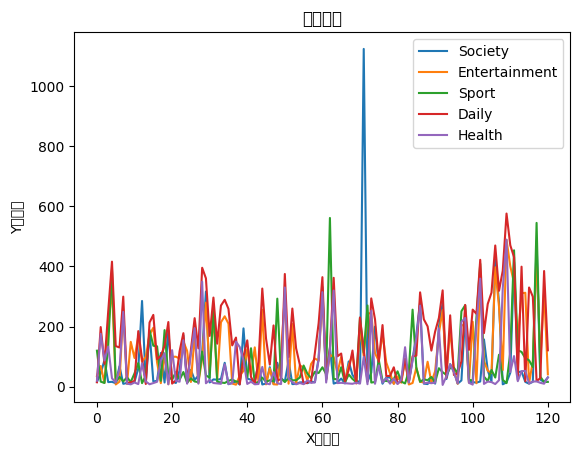

In [66]:
import matplotlib.pyplot as plt
# 创建一个新的图形
plt.figure()
topic_set_plt=['Society','Entertainment','Sport','Daily','Health']


# 遍历每个列表并画折线
for i, line_data in enumerate(hot_data_trans):
    plt.plot(line_data, label=f'{topic_set_plt[i]}')

# 添加标签和标题
plt.xlabel('X轴标签')
plt.ylabel('Y轴标签')
plt.title('多折线图')

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [ ]:
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,212,-1_孕妇_流产_事件_离婚,"[孕妇, 流产, 事件, 离婚, 仅以, 相关, 请求, 读作, 责任人, 处理]","[西安 孕妇 流产 事件 相关 责任人 处理, 西安 孕妇 流产 事件 相关 责任人 处理,..."
1,0,156,0_男子_怀孕_女子_同学,"[男子, 怀孕, 女子, 同学, 明白, 西安, 男孩, 妻子, 方便面, 邻居]","[妻子 怀孕 丈夫 陪 吃 营养餐 双双 吃 出 胆结石, 妻子 怀孕 丈夫 陪 吃 营养餐..."
2,1,96,1_晚会_张若昀_舞台_跨年,"[晚会, 张若昀, 舞台, 跨年, tvb, 合唱, 新剧, 最佳, 大湾, 区唱]","[郭京飞 微博 后缀 李唐 摩斯 密码, 郭京飞 微博 后缀 李唐 摩斯 密码, 郭京飞 微..."
3,2,74,2_2022_2021_新年_音乐会,"[2022, 2021, 新年, 音乐会, 第一条, 微博, 大湾, 票房, 迪士尼, 新年贺词]","[2022 新年 愿望, 大湾 区 2022 新年 音乐会, 大湾 区 2022 新年 音乐会]"
4,3,73,3_确诊_新增_浙江_宁波,"[确诊, 新增, 浙江, 宁波, 本土, 疫情, 核酸, 病例, 西安, 累计]","[浙江 宁波 新增 7 例 确诊, 浙江 宁波 新增 7 例 确诊, 浙江 宁波 新增 本土..."
5,4,59,4_西安_回应_防疫_哈萨克斯坦,"[西安, 回应, 防疫, 哈萨克斯坦, 地震, 云南, 网友, 市民, 接种, 卫生巾]","[西安 作协 主席 回应 批 索要 卫生巾 女子 矫情, 西安 作协 主席 回应 批 索要 ..."
6,5,29,5_医院_连续_院方_门口,"[医院, 连续, 院方, 门口, 猝死, 最终, 男子, 西安, 拒诊, 救命]","[西安 男子 连续 3 家 医院 拒诊 最终 猝死, 西安 男子 连续 3 家 医院 拒诊 ..."
7,6,24,6_中国_空间站_世界_视角,"[中国, 空间站, 世界, 视角, 青铜, 震撼, 地球, 天眼, 美国, 第一次]","[中国 空间站 第一次 办 画展, 第一 视角 中国 空间站 绝美 日出, 世界 期待 中国..."
8,7,19,7_奉献_追梦人_无数_奋斗,"[奉献, 追梦人, 无数, 奋斗, 雁塔, 区委书记, 免职, 整年, 付出, 收获]","[无数 追梦人 奋斗 奉献, 无数 追梦人 奋斗 奉献, 无数 追梦人 奋斗 奉献]"
9,8,18,8_赢得_运动员_落泪_诺维茨基,"[赢得, 运动员, 落泪, 诺维茨基, 冰球, 男篮, 比赛, 广州队, 国歌, 听到]","[互为 依靠 祖国 赢得 45 枚 金牌, 冰球 运动员 赢得 比赛 听到 国歌 落泪, 冰..."


In [ ]:
# 可视化选定的主题和文档
# topic_model.visualize_documents(docs)


In [ ]:
new_topics = topic_model.reduce_outliers(docs, topics)
topic_model.update_topics(docs, topics=new_topics)


100%|██████████| 1/1 [00:00<00:00, 119.40it/s]
2023-12-23 21:09:14,155 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [ ]:
# topic_model.get_topic_info()


In [ ]:
flg = topic_model.visualize_documents(docs)
flg.write_image('output.png')


NameError: name 'topic_model' is not defined